<a href="https://colab.research.google.com/github/DineshFoujdar/Machine-Learning-Projects/blob/main/Customer_Segmentation_Using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, v_measure_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [101]:
!pip install gdown

#LOAD DATASET

In [103]:
!gdown https://drive.google.com/uc?id={'1XGcnfbsZmEMHuSeUOcefY6n1Xb2qi6dW'}

import pandas as pd
df_cust = pd.read_csv('Customer_Data (1).csv')
df_cust.head()

Downloading...
From: https://drive.google.com/uc?id=1XGcnfbsZmEMHuSeUOcefY6n1Xb2qi6dW
To: /content/Customer_Data (1).csv
100% 903k/903k [00:00<00:00, 81.7MB/s]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Preprocessing

In [104]:
# Display dataset information
print(df_cust.shape)
print(df_cust.info())

(8950, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [105]:
print(df_cust.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [106]:
# Calculate percentage of missing values
missing_percentage = df_cust.isnull().sum() / len(df_cust) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64


In [107]:
# Check for missing values and fill them with the mean of the column
df_cust["MINIMUM_PAYMENTS"] = df_cust["MINIMUM_PAYMENTS"].fillna(df_cust["MINIMUM_PAYMENTS"].mean())
df_cust["CREDIT_LIMIT"] = df_cust["CREDIT_LIMIT"].fillna(df_cust["CREDIT_LIMIT"].mean())

In [108]:
print(df_cust.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [109]:
# Check for duplicate rows
print(df_cust.duplicated().sum())

0


In [110]:
# Drop unnecessary columns
df_cust.drop(columns=["CUST_ID"], axis=1, inplace=True)
print(df_cust.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [111]:
df_cust.shape

(8950, 17)

In [124]:
#Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(df_cust.select_dtypes(include=[np.number]))  # Use only numerical columns


#Exploratory Data Analysis (EDA)


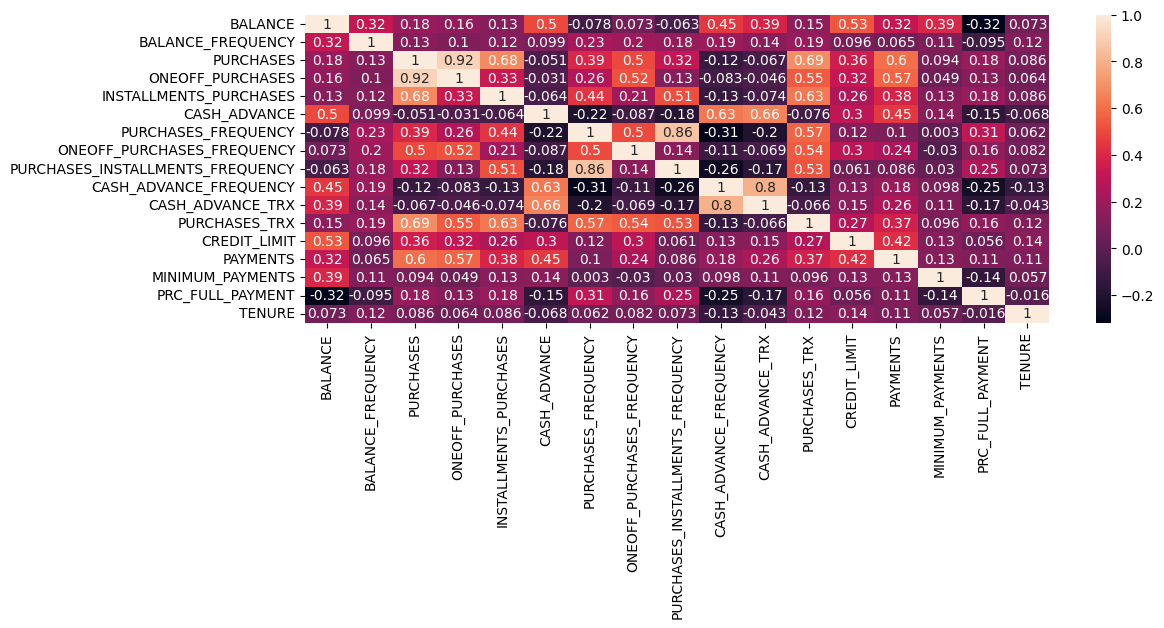

In [112]:
# Heatmap of correlations
plt.figure(figsize=(12,4))
sns.heatmap(df_cust.corr(), annot=True)
plt.show()

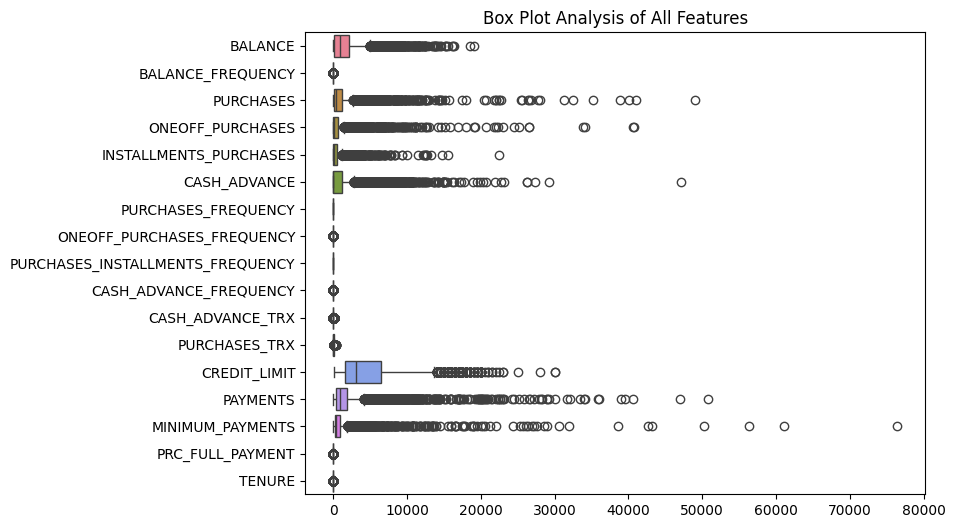

In [119]:
# Box plot for all features in the dataset
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cust, orient="h")
plt.title("Box Plot Analysis of All Features")
plt.show()


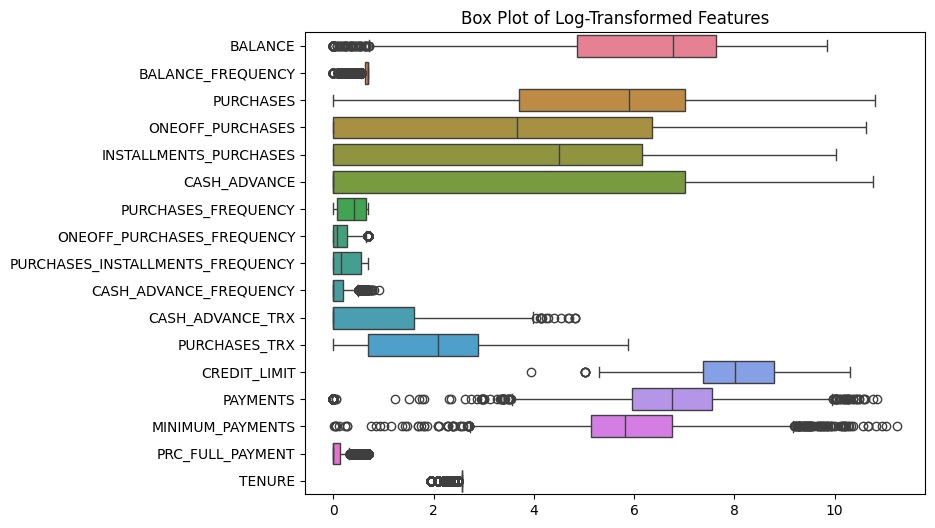

In [120]:
# Log-transform selected columns to reduce the impact of extreme outliers
df_log = df_cust.select_dtypes(include=[np.number]).apply(lambda x: np.log1p(x))

# Plot the box plot for log-transformed data
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_log, orient="h")
plt.title("Box Plot of Log-Transformed Features")
plt.show()


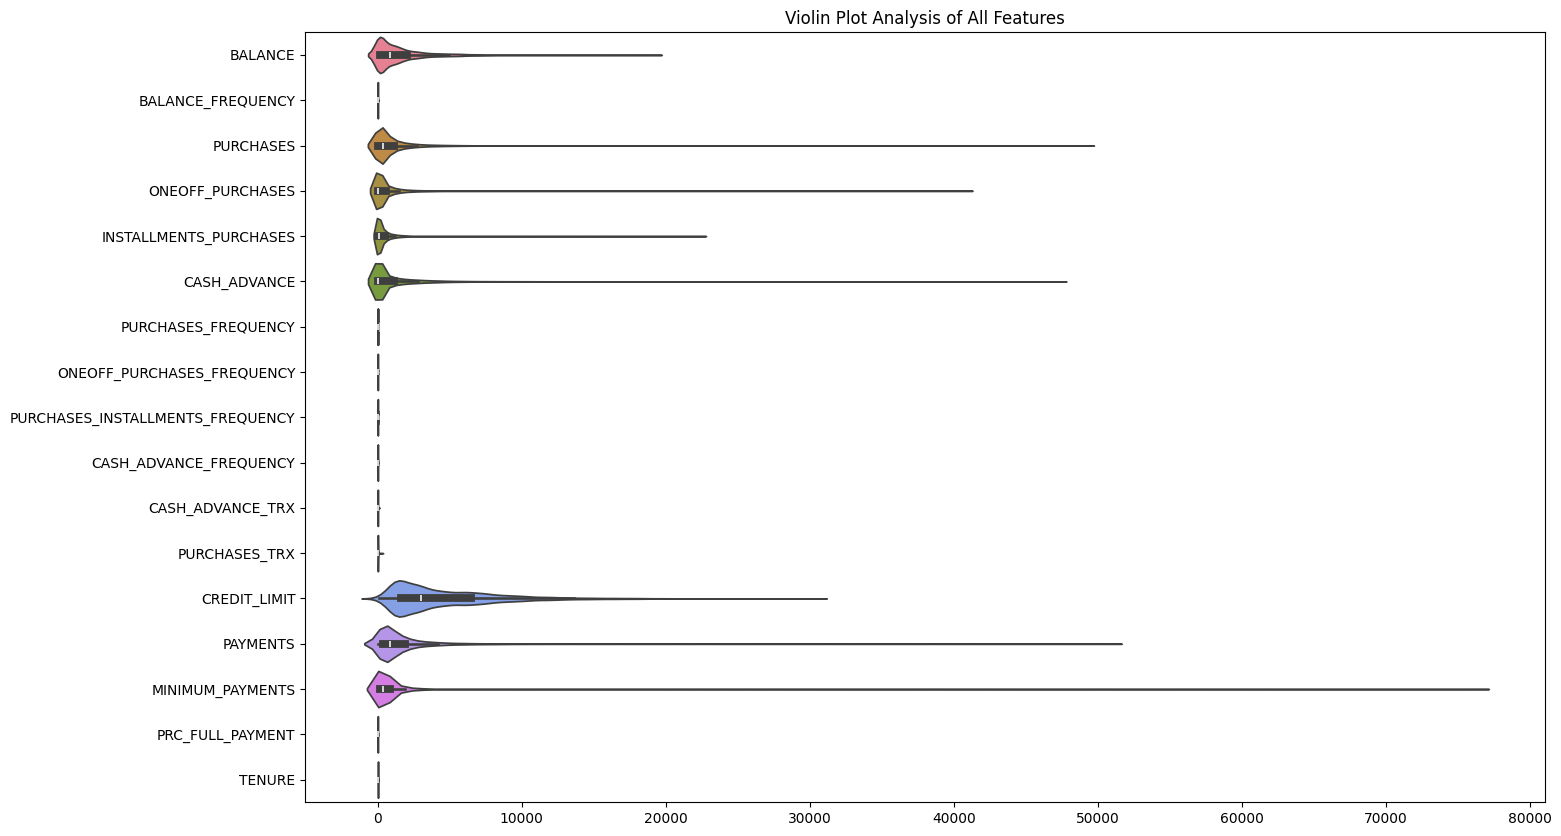

In [121]:
# Violin plot for all features
plt.figure(figsize=(16, 10))
sns.violinplot(data=df_cust, orient="h")
plt.title("Violin Plot Analysis of All Features")
plt.show()



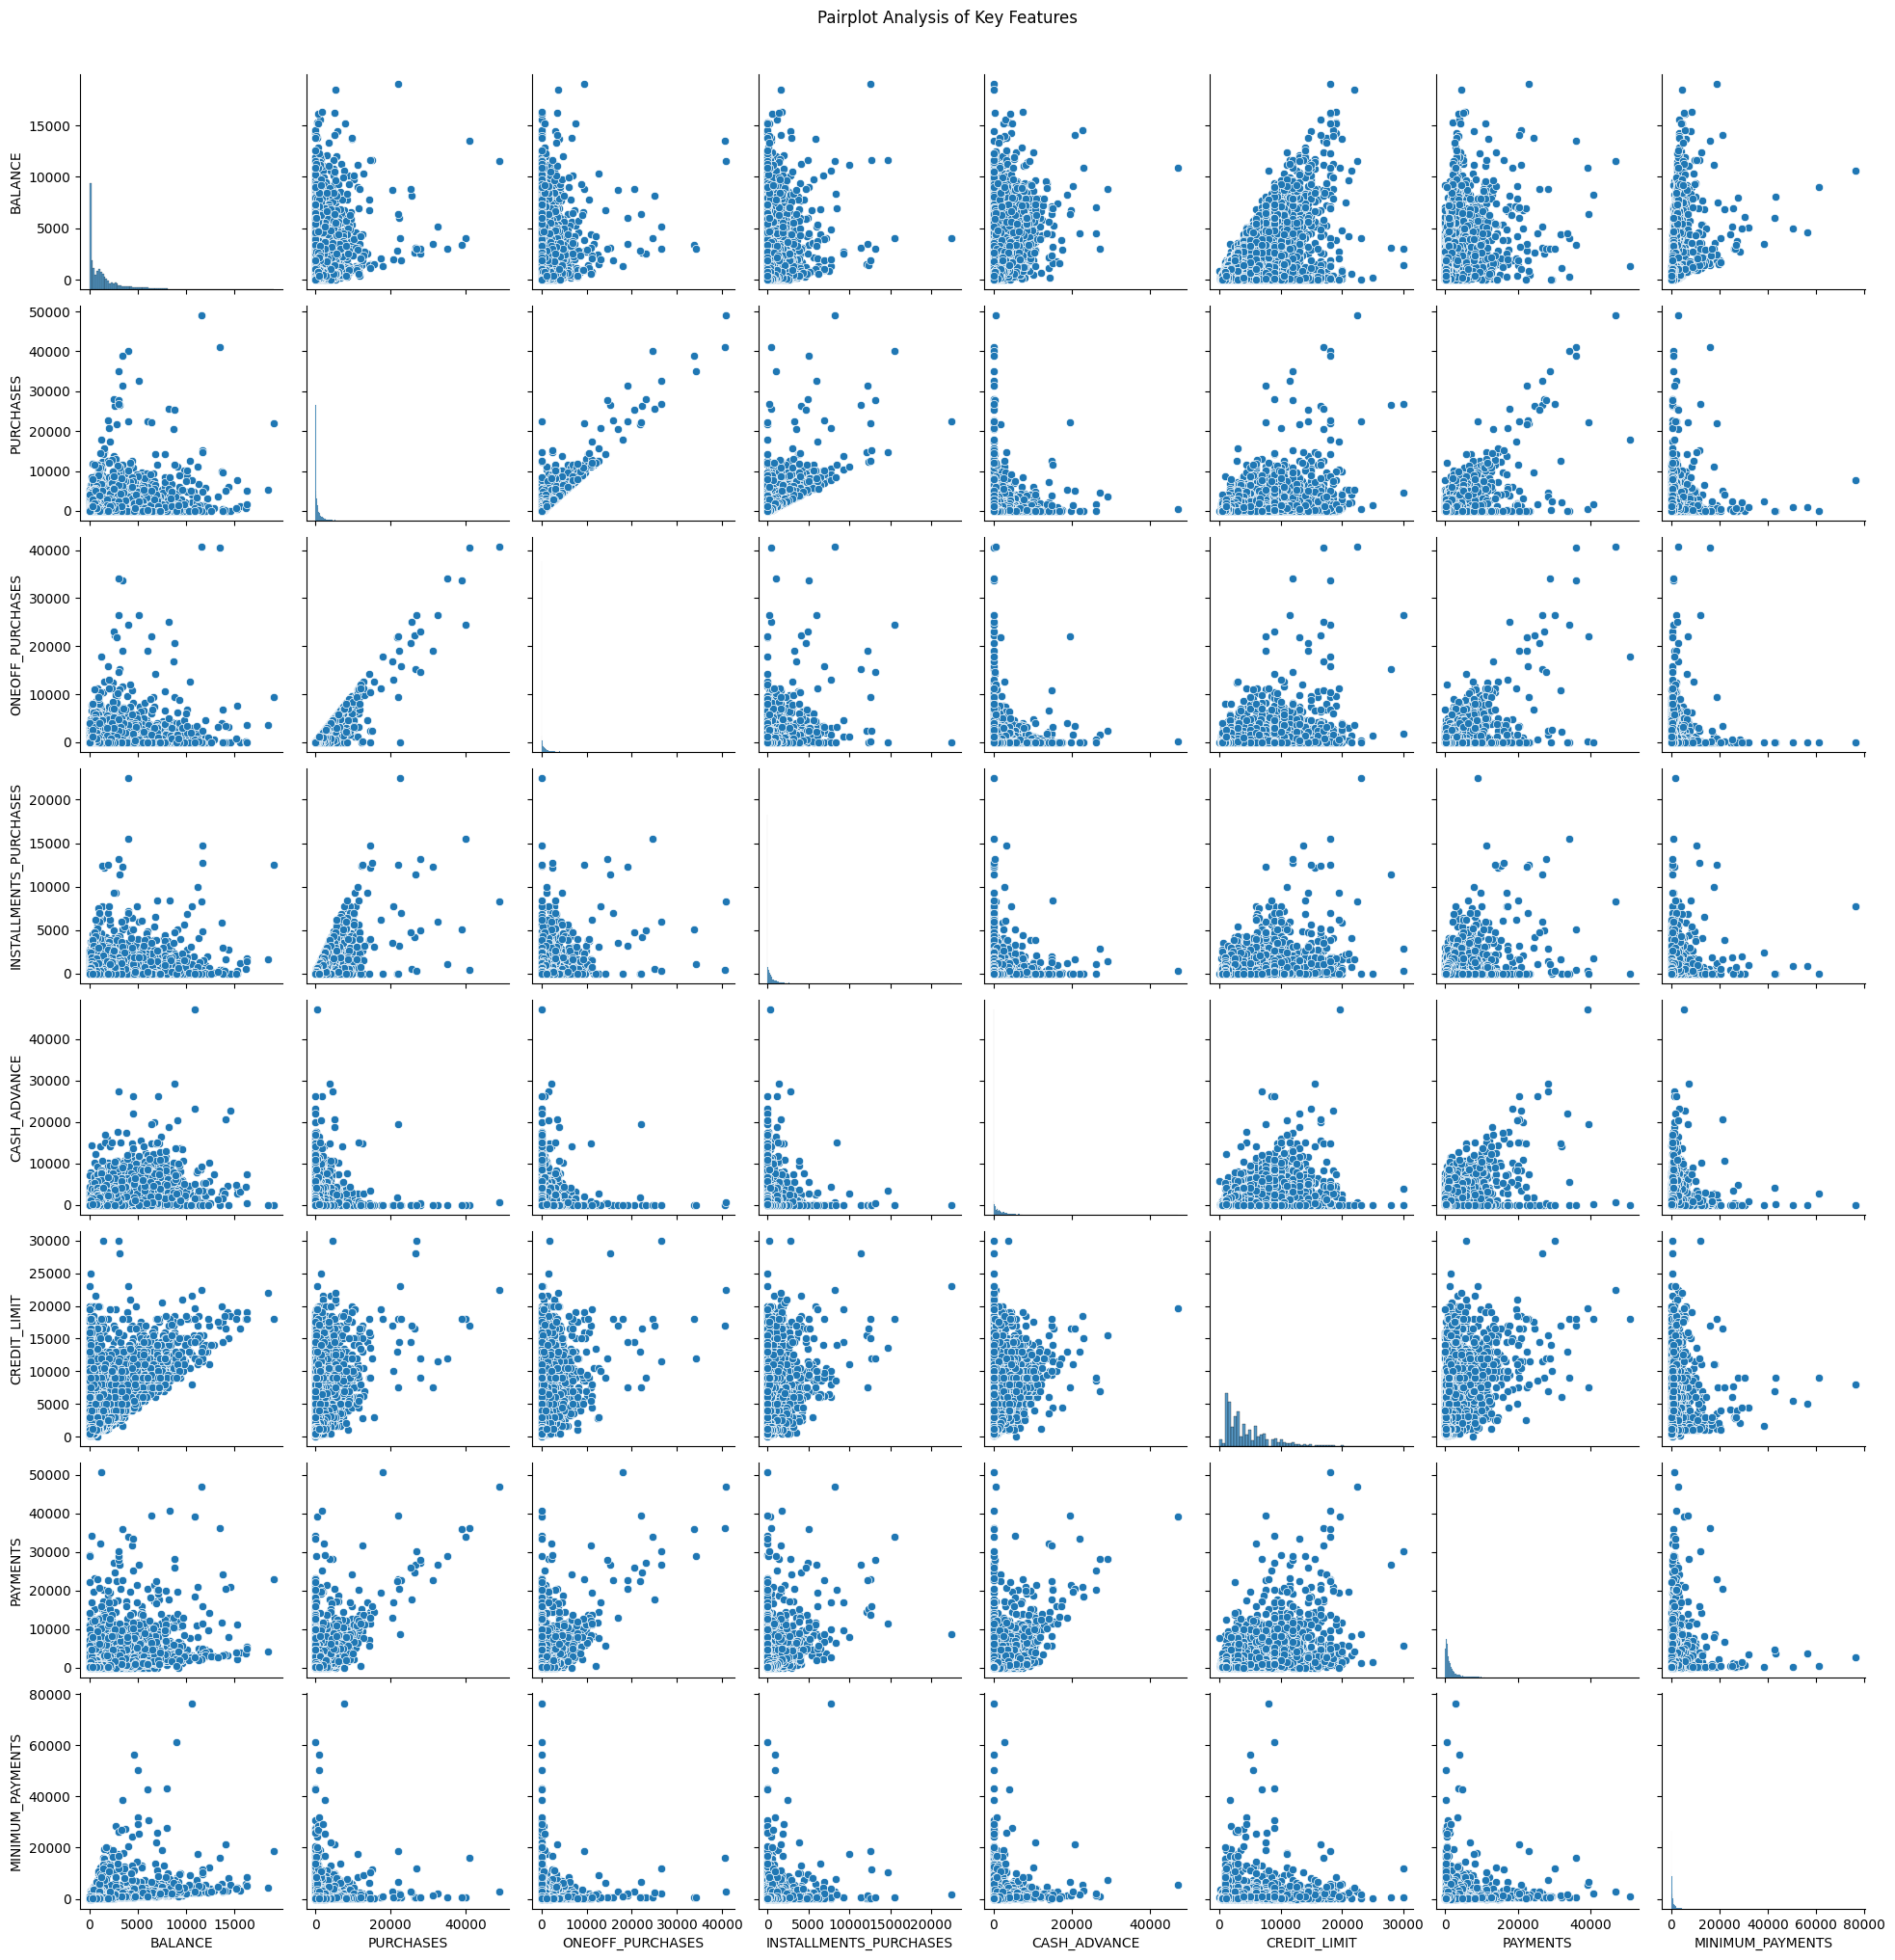

In [122]:
# Pairplot for selected features to explore relationships
sns.pairplot(df_cust[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                      'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']])
plt.suptitle("Pairplot Analysis of Key Features", y=1.02)
plt.show()


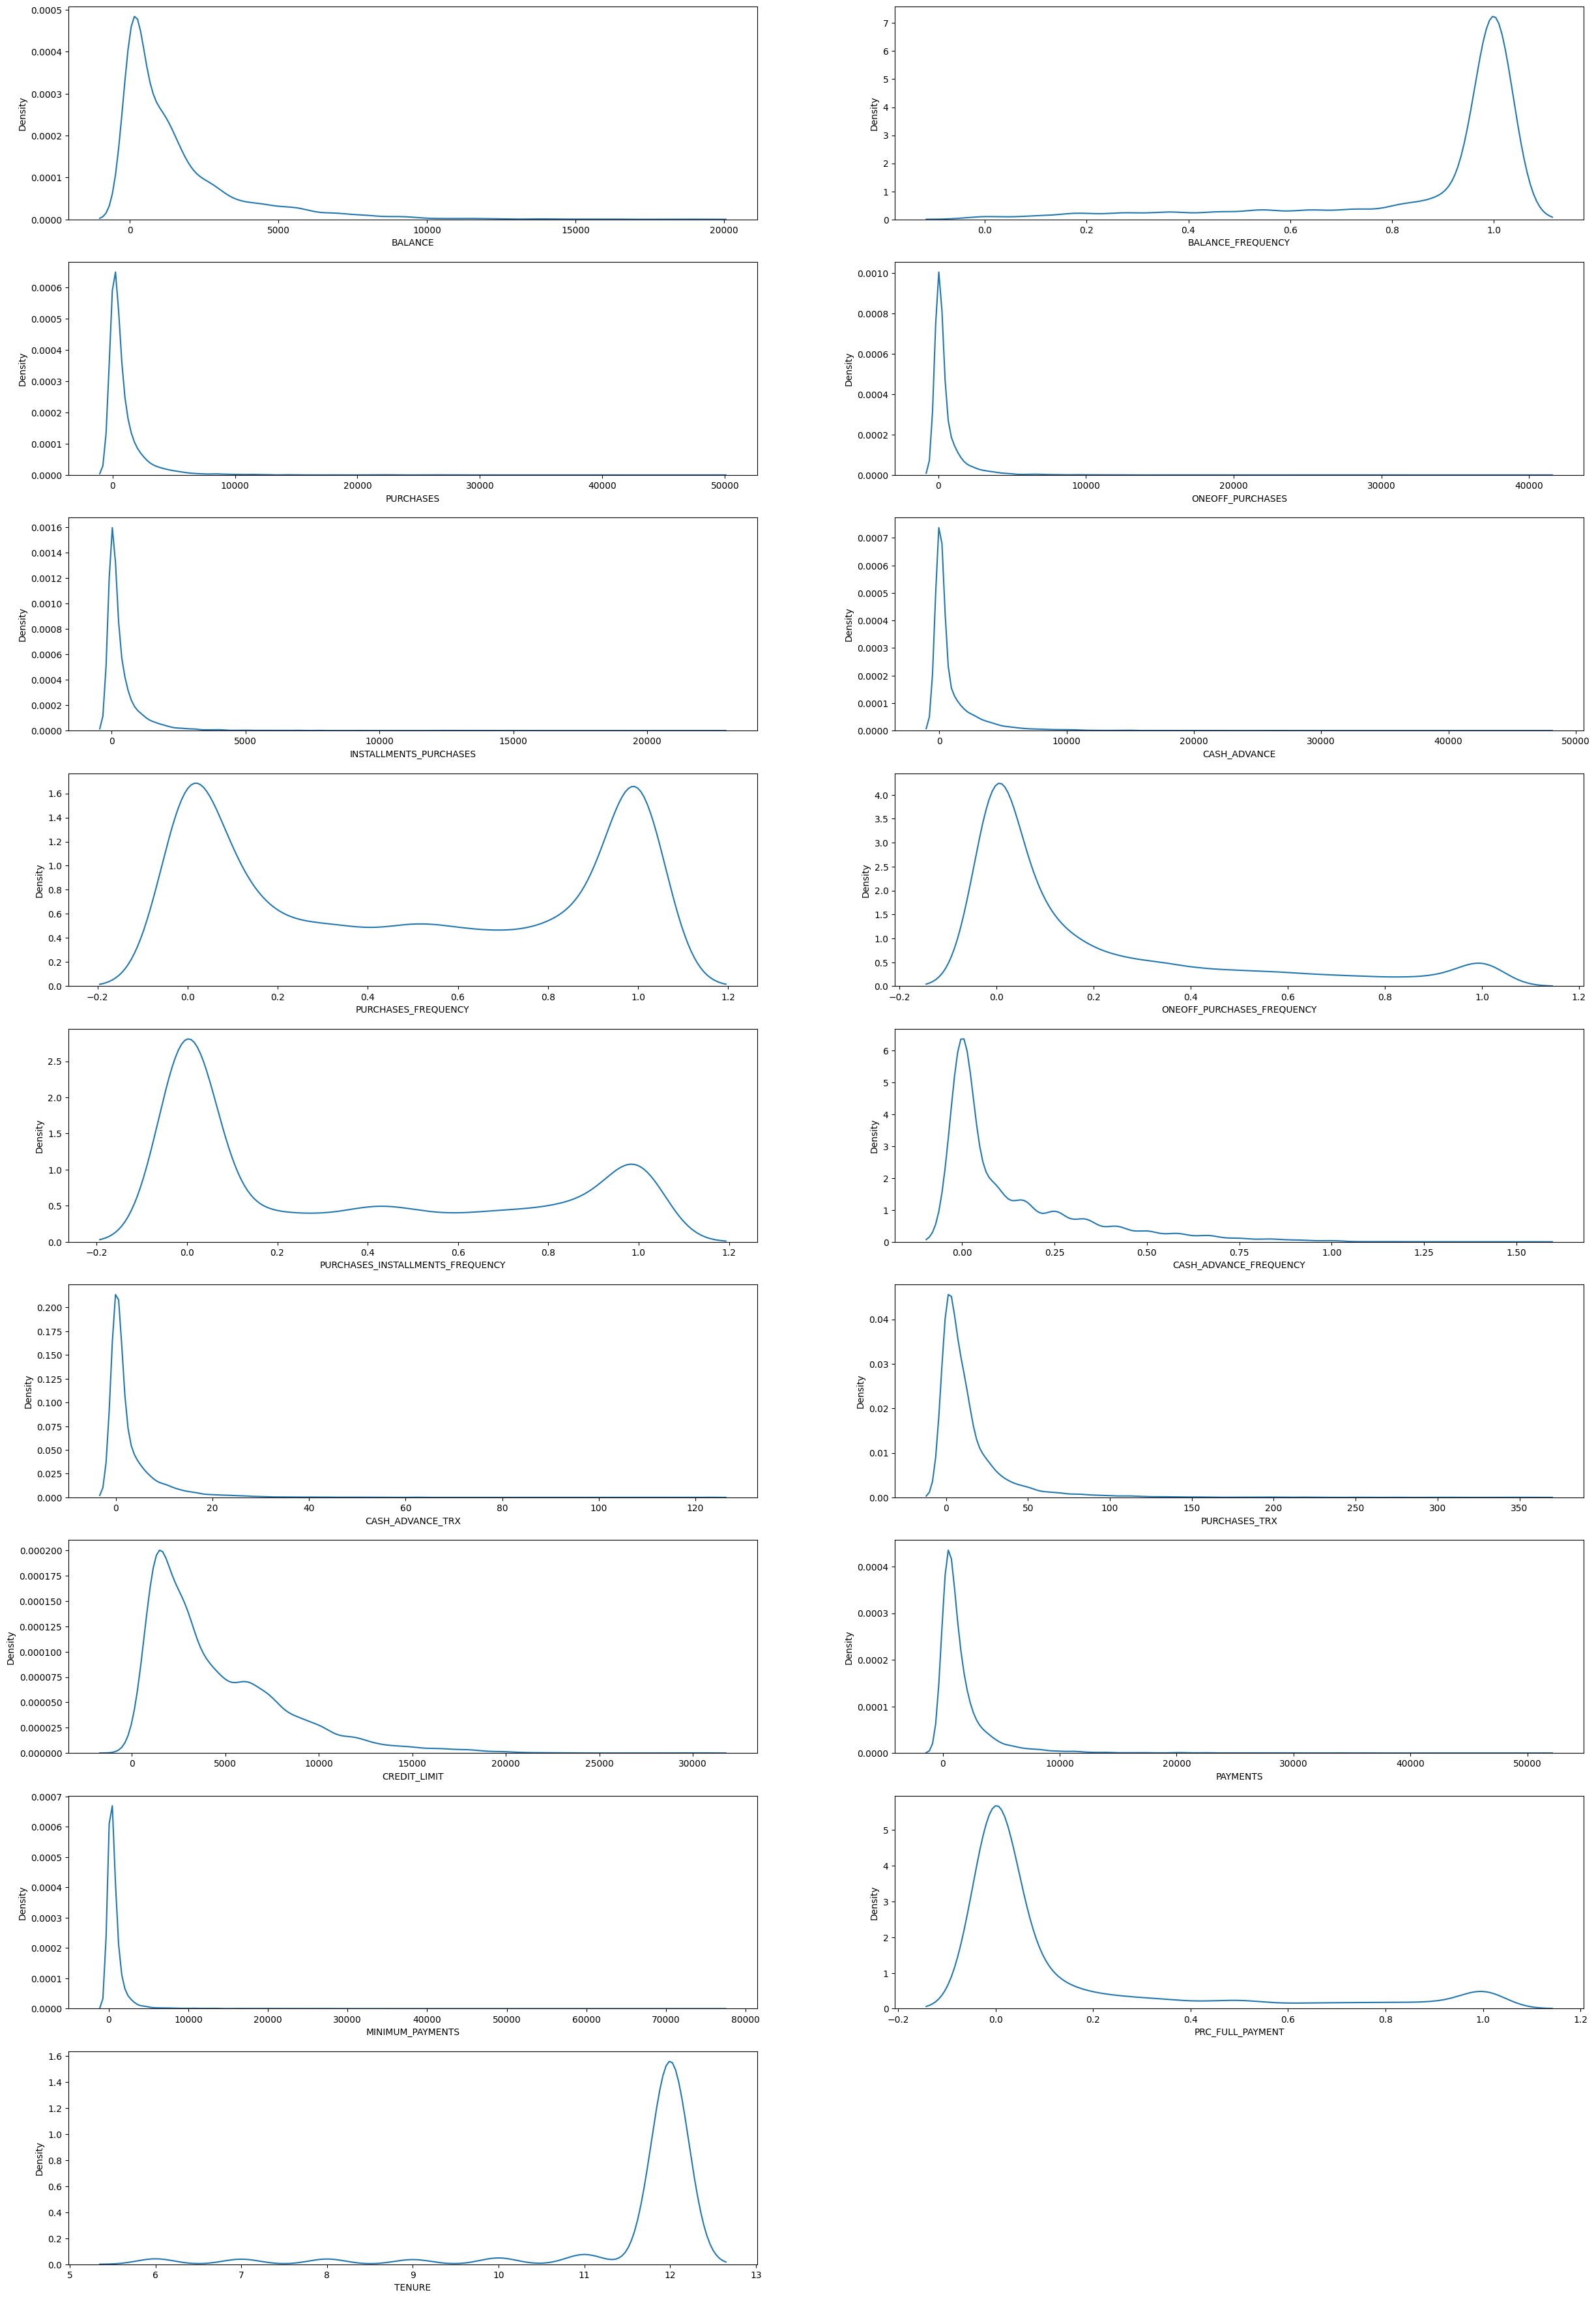

In [123]:
# Plot KDE for each feature
plt.figure(figsize=(30,45))
for i, col in enumerate(df_cust.columns):
    if df_cust[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_cust[col], ax=ax)
        plt.xlabel(col)
plt.show()



#Dimensionality Reduction using PCA


In [181]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df_cust = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2" ])
pca_df_cust.head()

,PCA1,PCA2
0,-4326.383956,921.566884
1,4118.916676,-2432.846347
2,1497.907660,-1997.578692
3,1394.548556,-1488.743450
4,-3743.351874,757.342659


#Clustering



##K-MEANS

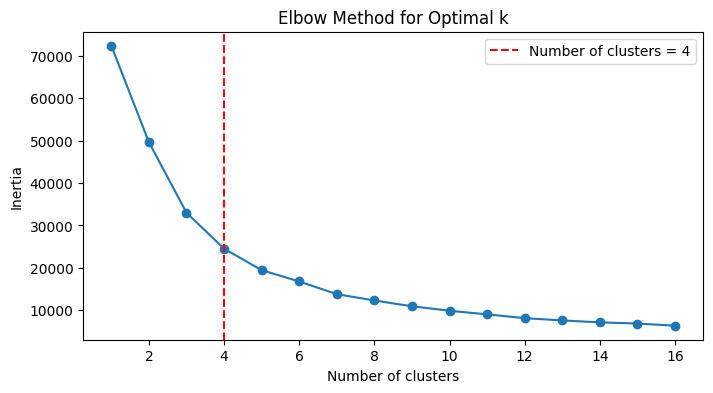

In [145]:
# K-means clustering
inertia = []
range_val = range(1, 17)
for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_df_cust)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range_val, inertia, marker='o')
plt.axvline(x=4, color='r', linestyle='--', label='Number of clusters = 4')  # Vertical line at k=4
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.title('Elbow Method for Optimal k')
plt.legend()
plt.show()


In [146]:
# Fit K-means with optimal clusters
k_optimal = 4
kmeans_model = KMeans(n_clusters = k_optimal)
kmeans_model.fit(pca_df_cust)
pca_df_cust["cluster_kmeans"] = kmeans_model.labels_

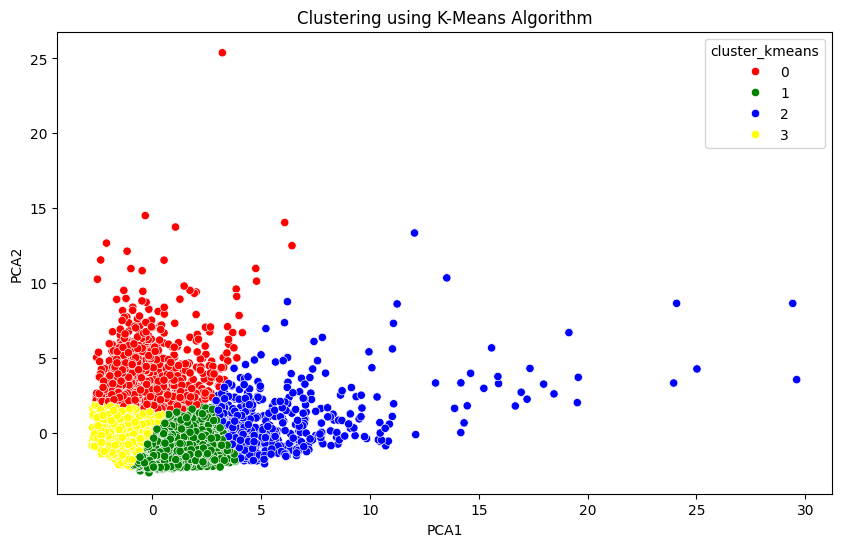

In [147]:
# Plot clusters
plt.figure(figsize=(10,6))
col=['red','green','blue','yellow']
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster_kmeans", data=pca_df_cust, palette=col)
plt.title("Clustering using K-Means Algorithm")
plt.show()

##DBSCAN

In [148]:
# DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_model.fit(pca_df_cust)
pca_df_cust["cluster_dbscan"] = dbscan_model.labels_


<ipython-input-149-3a9edf3cb906>:4: UserWarning: 
The palette list has fewer values (4) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x="PCA1", y="PCA2", hue="cluster_dbscan", data=pca_df_cust, palette=col)


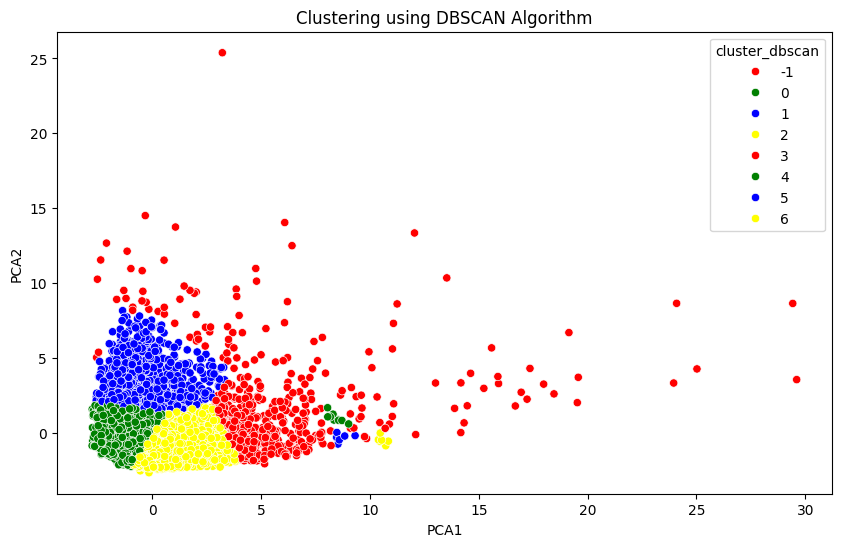

In [149]:
# Plot clusters
plt.figure(figsize=(10,6))
col=['red','green','blue','yellow']
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster_dbscan", data=pca_df_cust, palette=col)
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

##GMM

In [150]:
# GMM clustering
GMM = GaussianMixture(n_components= k_optimal)
GMM.fit(pca_df_cust)
pca_df_cust["cluster_gmm"] = GMM.predict(pca_df_cust)

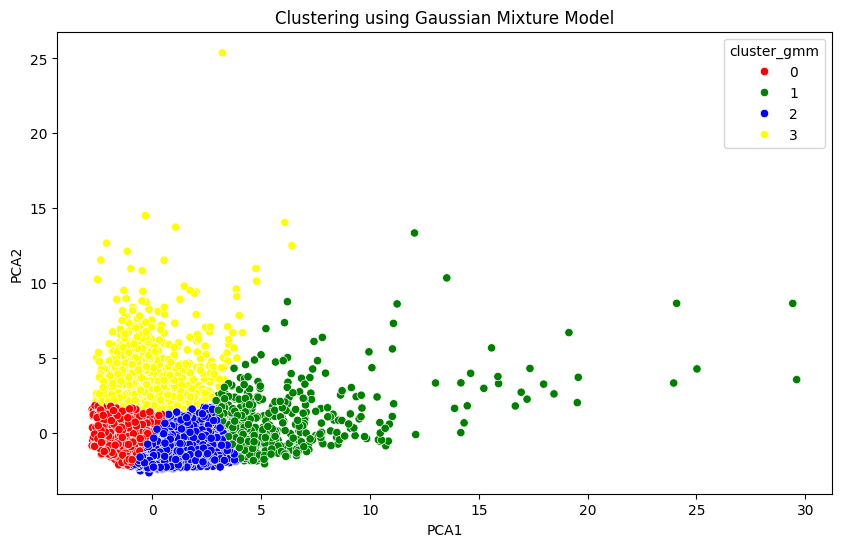

In [151]:

# Plot clusters
plt.figure(figsize=(10,6))
col=['red','green','blue','yellow']
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster_gmm", data=pca_df_cust, palette= col)
plt.title("Clustering using Gaussian Mixture Model")
plt.show()

EVALUATING CLUSTERING TECH

K-Means Silhouette Score: 0.6287
GMM Silhouette Score: 0.6184
DBSCAN Silhouette Score: 0.6287


K-Means Davies-Bouldin Index: 0.6748
GMM Davies-Bouldin Index: 0.9018
DBSCAN Davies-Bouldin Index: 0.6748


K-Means Calinski-Harabasz Index: 9157.1615
GMM Calinski-Harabasz Index: 4594.8820
DBSCAN Calinski-Harabasz Index: 9157.1615




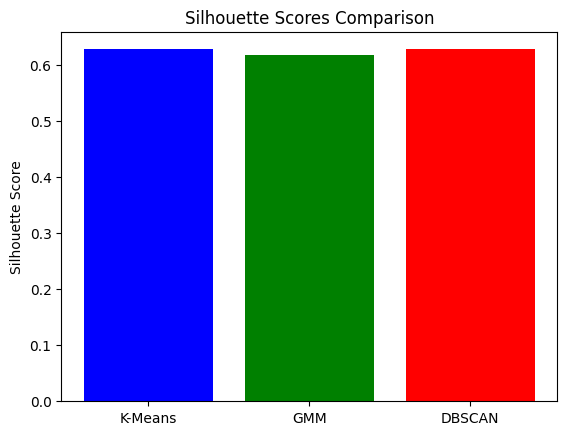

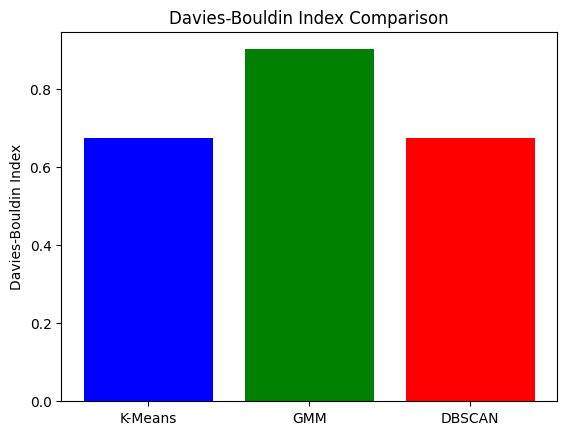

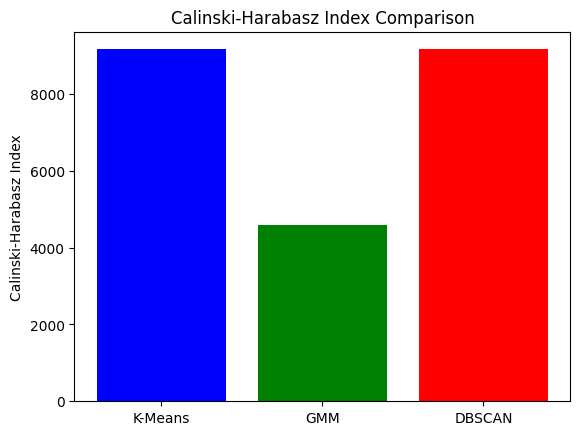

In [152]:
# Calculate metrics for each model

# Silhouette Score
kmeans_silhouette = silhouette_score(pca_df_cust, pca_df_cust["cluster_kmeans"])
gmm_silhouette = silhouette_score(pca_df_cust, pca_df_cust["cluster_dbscan"])
dbscan_silhouette = silhouette_score(pca_df_cust, pca_df_cust["cluster_gmm"])

# Davies-Bouldin Index
kmeans_db = davies_bouldin_score(pca_df_cust, pca_df_cust["cluster_kmeans"])
gmm_db = davies_bouldin_score(pca_df_cust, pca_df_cust["cluster_dbscan"])
dbscan_db = davies_bouldin_score(pca_df_cust, pca_df_cust["cluster_gmm"])

# Calinski-Harabasz Index
kmeans_ch = calinski_harabasz_score(pca_df_cust, pca_df_cust["cluster_kmeans"])
gmm_ch = calinski_harabasz_score(pca_df_cust, pca_df_cust["cluster_dbscan"])
dbscan_ch = calinski_harabasz_score(pca_df_cust, pca_df_cust["cluster_gmm"])

# Step 6: Display Results

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"GMM Silhouette Score: {gmm_silhouette:.4f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
print("\n")

print(f"K-Means Davies-Bouldin Index: {kmeans_db:.4f}")
print(f"GMM Davies-Bouldin Index: {gmm_db:.4f}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db:.4f}")
print("\n")

print(f"K-Means Calinski-Harabasz Index: {kmeans_ch:.4f}")
print(f"GMM Calinski-Harabasz Index: {gmm_ch:.4f}")
print(f"DBSCAN Calinski-Harabasz Index: {dbscan_ch:.4f}")
print("\n")

# Visualizations

# 1. Silhouette Score comparison plot
methods = ['K-Means', 'GMM', 'DBSCAN']
sil_scores = [kmeans_silhouette, gmm_silhouette, dbscan_silhouette]

plt.bar(methods, sil_scores, color=['blue', 'green', 'red'])
plt.title('Silhouette Scores Comparison')
plt.ylabel('Silhouette Score')
plt.show()

# 2. Davies-Bouldin Index comparison plot
db_scores = [kmeans_db, gmm_db, dbscan_db]

plt.bar(methods, db_scores, color=['blue', 'green', 'red'])
plt.title('Davies-Bouldin Index Comparison')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# 3. Calinski-Harabasz Index comparison plot
ch_scores = [kmeans_ch, gmm_ch, dbscan_ch]

plt.bar(methods, ch_scores, color=['blue', 'green', 'red'])
plt.title('Calinski-Harabasz Index Comparison')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

Best Clustering Technique

In [153]:
# Create a dictionary to store the metrics for each clustering method
metrics = {
    "K-Means": {
        "Silhouette Score": kmeans_silhouette,
        "Davies-Bouldin Index": kmeans_db,
        "Calinski-Harabasz Index": kmeans_ch
    },
    "GMM": {
        "Silhouette Score": gmm_silhouette,
        "Davies-Bouldin Index": gmm_db,
        "Calinski-Harabasz Index": gmm_ch
    },
    "DBSCAN": {
        "Silhouette Score": dbscan_silhouette,
        "Davies-Bouldin Index": dbscan_db,
        "Calinski-Harabasz Index": dbscan_ch
    }
}

# Determine the best clustering method based on the highest Silhouette Score
best_method_silhouette = max(metrics, key=lambda x: metrics[x]["Silhouette Score"])

# Determine the best clustering method based on the lowest Davies-Bouldin Index
best_method_db = min(metrics, key=lambda x: metrics[x]["Davies-Bouldin Index"])

# Determine the best clustering method based on the highest Calinski-Harabasz Index
best_method_ch = max(metrics, key=lambda x: metrics[x]["Calinski-Harabasz Index"])

# Summary of the best methods based on each metric
print(f"Best method based on Silhouette Score: {best_method_silhouette}")
print(f"Best method based on Davies-Bouldin Index: {best_method_db}")
print(f"Best method based on Calinski-Harabasz Index: {best_method_ch}")

# Overall best method (taking all metrics into account, prioritizing Silhouette Score first, followed by Davies-Bouldin and Calinski-Harabasz)
# For simplicity, we'll choose the method that is best across the most number of metrics
scores = {
    "K-Means": [kmeans_silhouette, -kmeans_db, kmeans_ch],
    "GMM": [gmm_silhouette, -gmm_db, gmm_ch],
    "DBSCAN": [dbscan_silhouette, -dbscan_db, dbscan_ch]
}

# Sum of scores for overall best method
overall_best_method = max(scores, key=lambda x: sum(scores[x]))

print(f"Overall best clustering method: {overall_best_method}")

Best method based on Silhouette Score: K-Means
Best method based on Davies-Bouldin Index: K-Means
Best method based on Calinski-Harabasz Index: K-Means
Overall best clustering method: K-Means


Results and Interpretations (using the best clustering method)

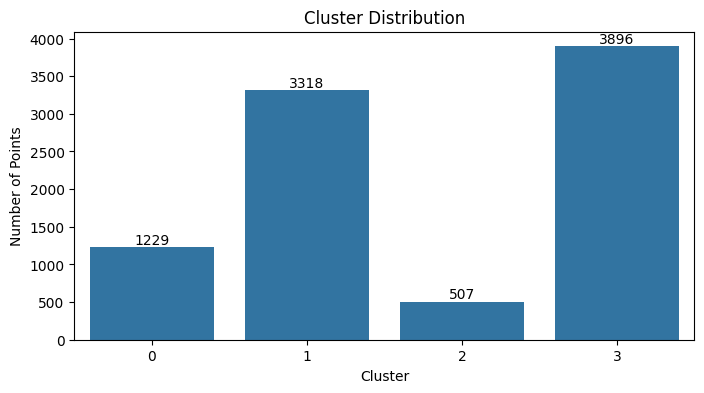

In [160]:
# Create a new column 'Cluster' based on the preferred method (here K-Means)
df_cust['Cluster'] = pca_df_cust['cluster_kmeans']  # Or 'cluster_dbscan' or 'cluster_gmm'

# Now, visualize the clusters with count labels
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=pca_df_cust)

# Add count labels on top of the bars
cluster_counts = df_cust['Cluster'].value_counts().sort_index()  # Ensure counts are sorted by cluster label
for i, count in enumerate(cluster_counts):
    plt.text(i, count + 0.2, str(count), ha='center', va='bottom')  # Adjust text positioning

# Add title and labels
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')

# Show the plot
plt.show()

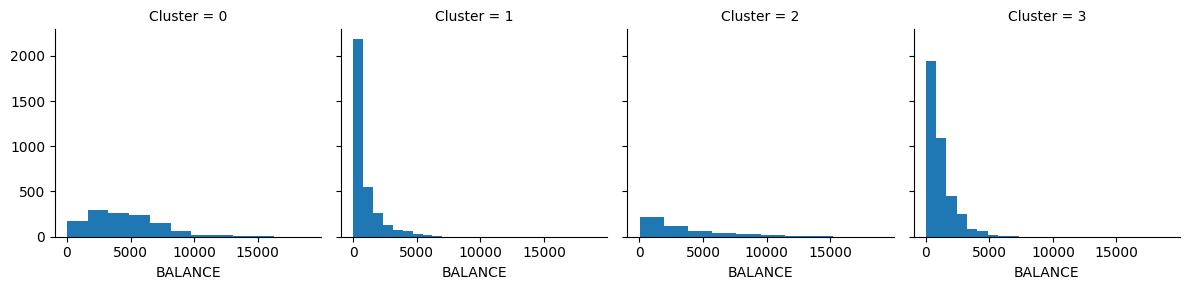

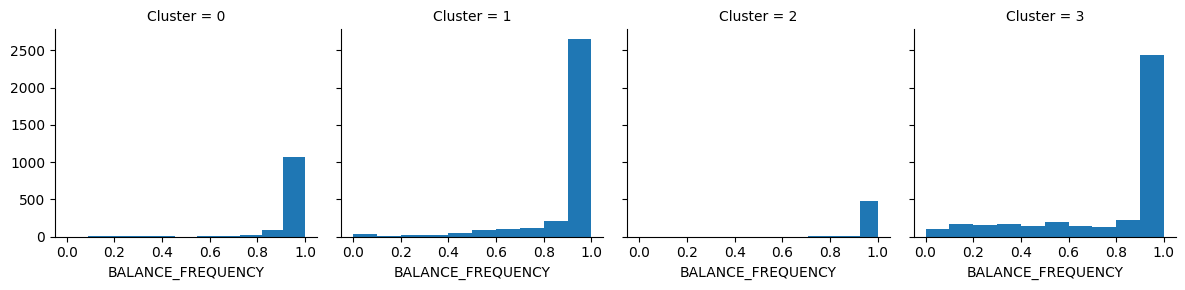

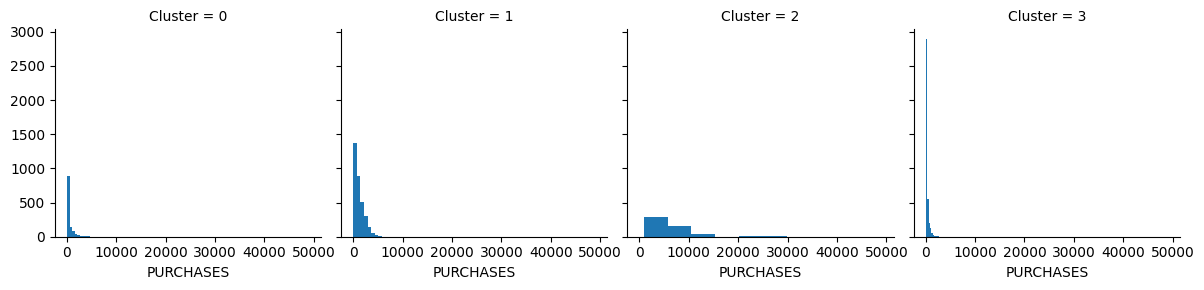

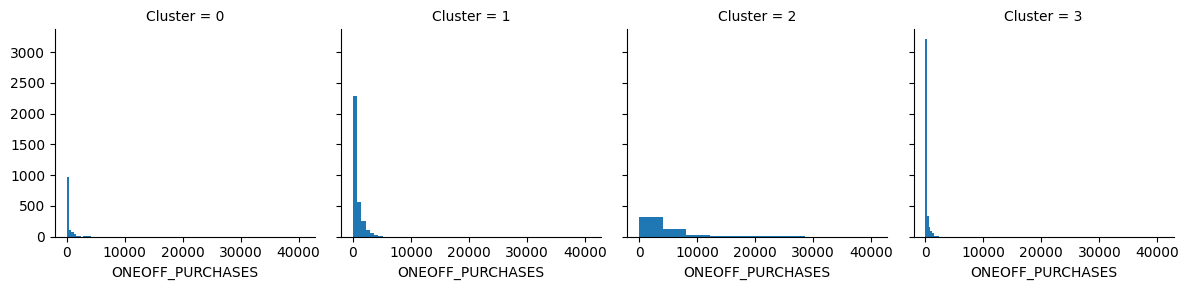

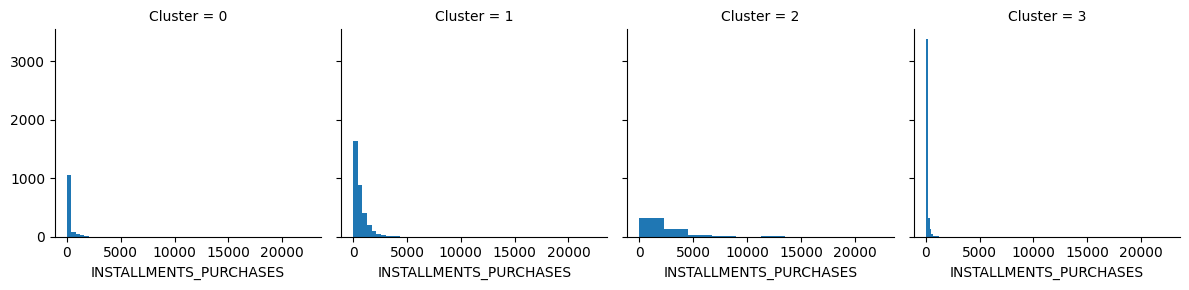

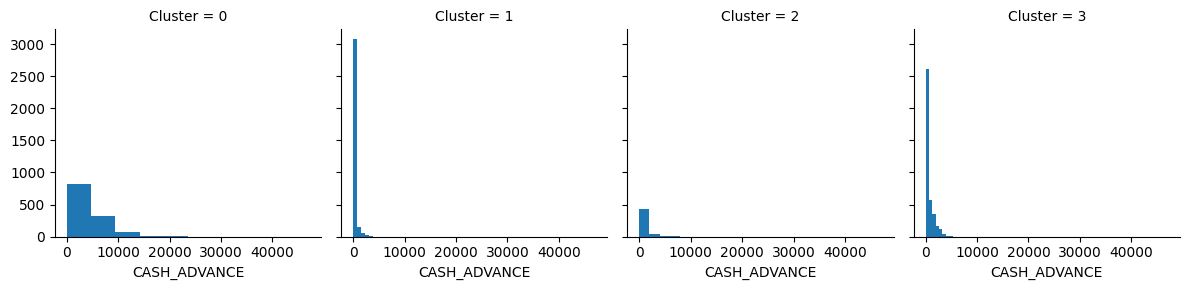

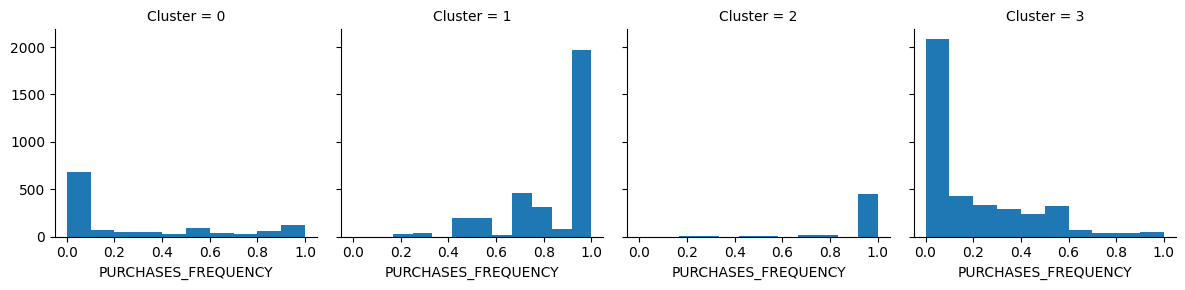

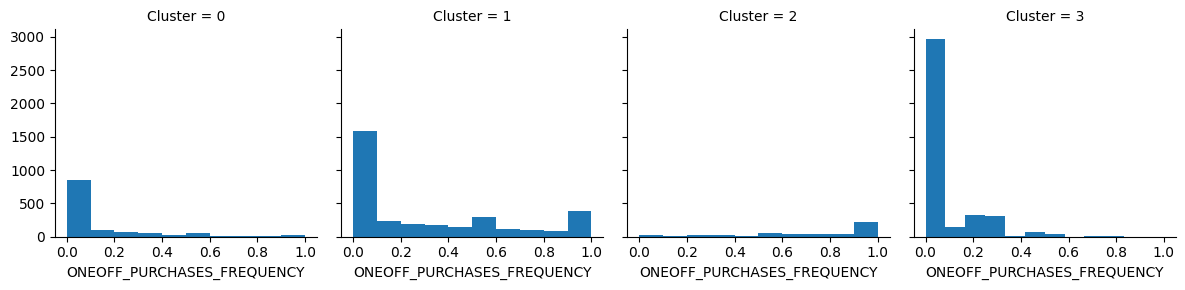

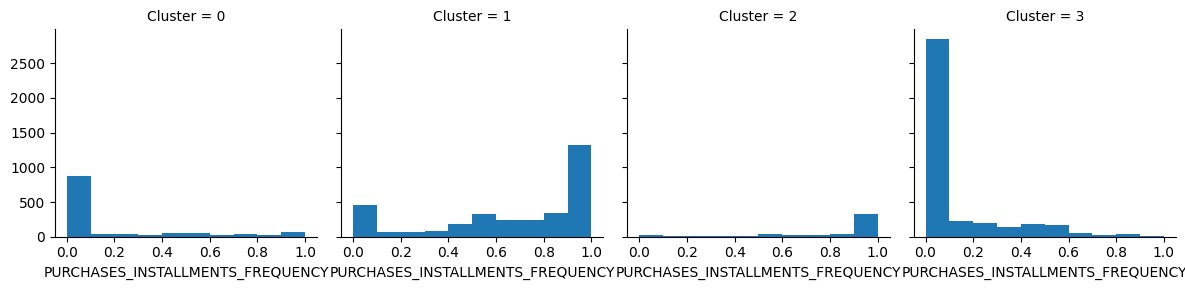

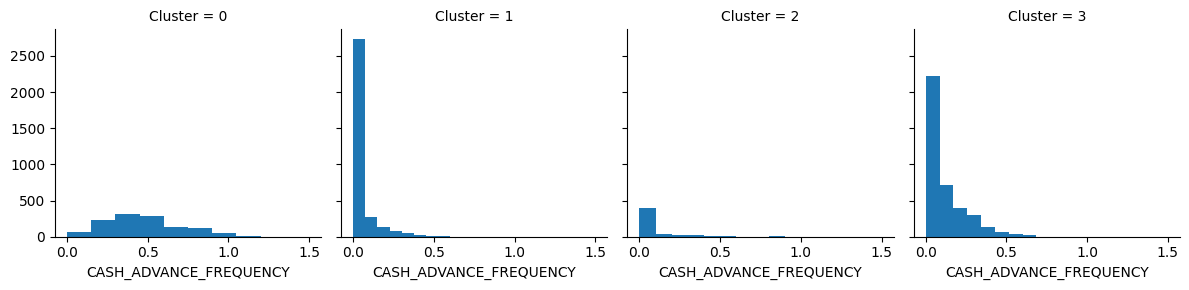

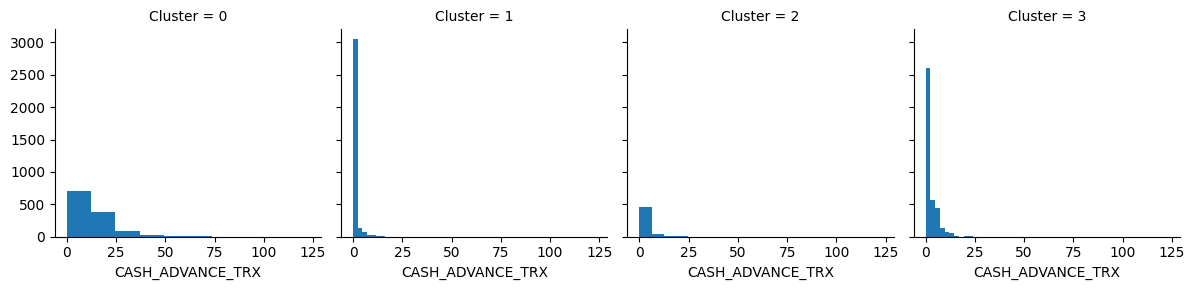

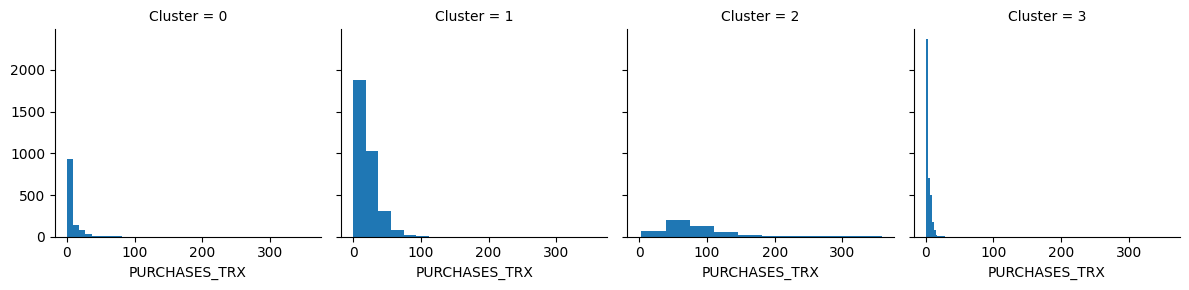

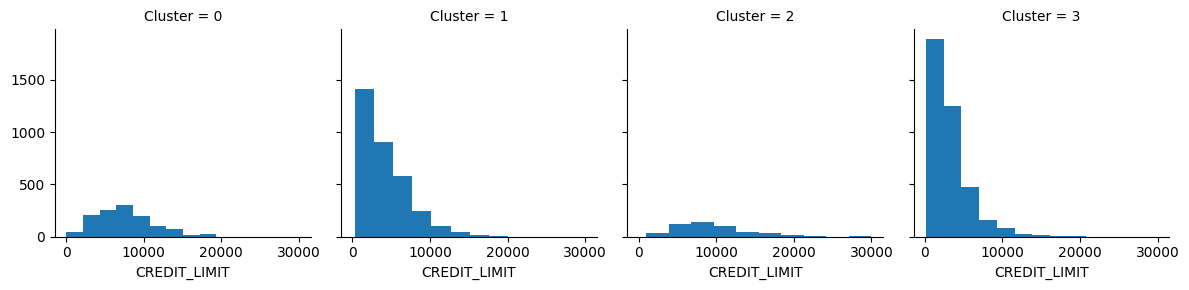

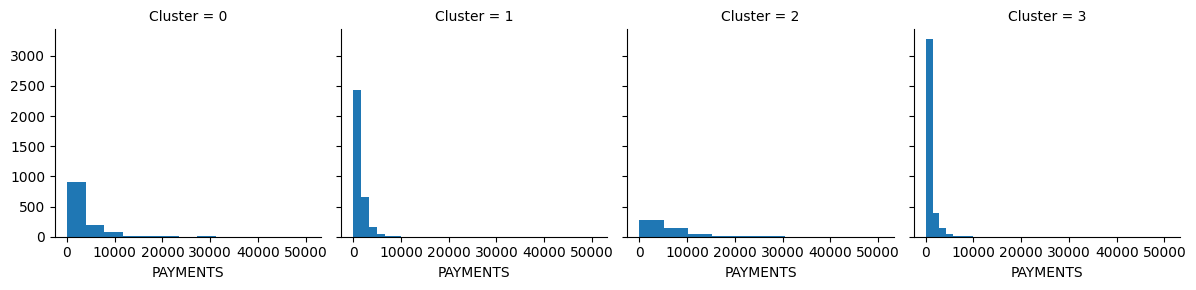

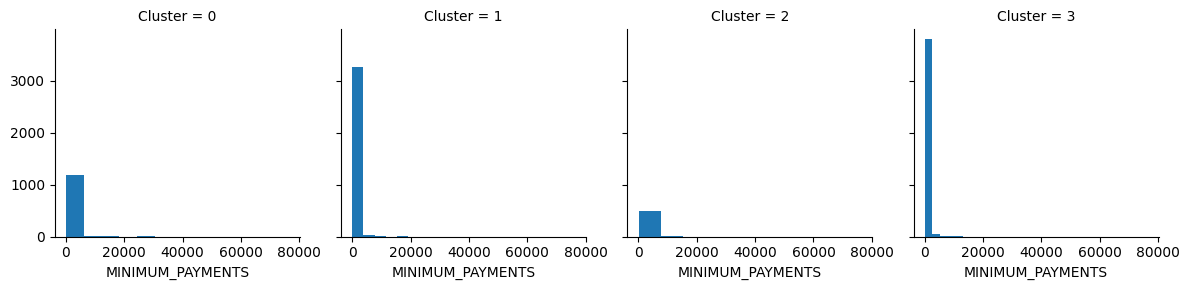

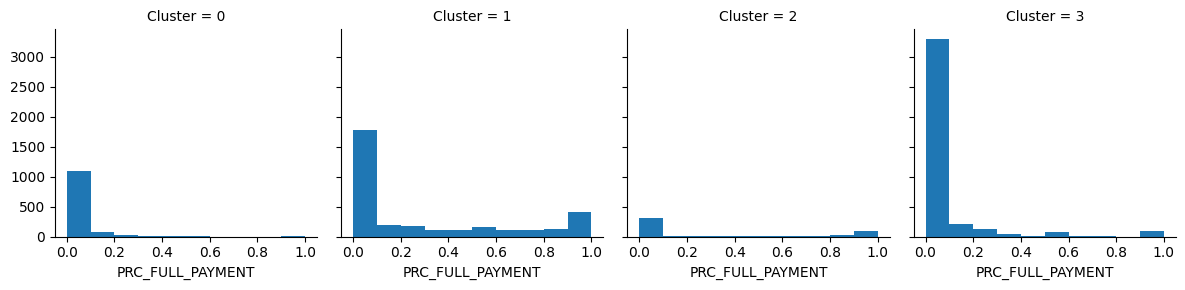

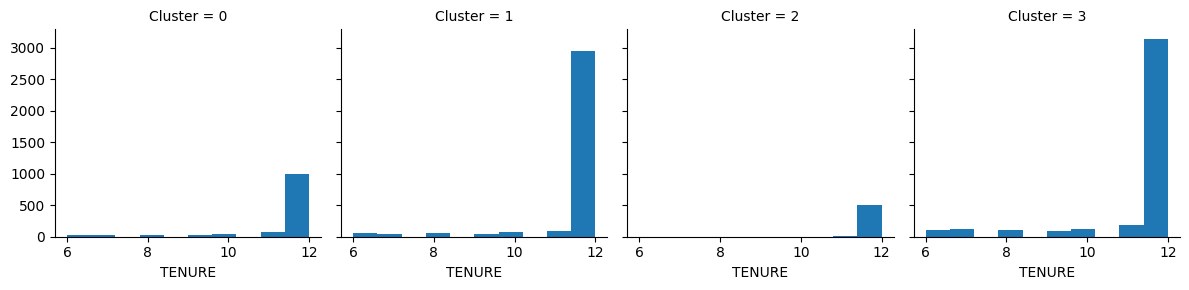

In [161]:
# Feature distribution by clusters
for c in df_cust.drop(['Cluster'], axis=1):
    grid = sns.FacetGrid(df_cust, col='Cluster')
    grid.map(plt.hist, c)
    plt.show()

# Saving and Loading Models

In [162]:
#Saving Scikitlearn models
import joblib

In [163]:
# Save the best clustering model
overall_best_method == "KMeans"
joblib.dump(kmeans_model, "Best_clustering_model_k-Means.pkl")

['Best_clustering_model_k-Means.pkl']

In [164]:
# Save clustered data
df_cust.to_csv("New_Clustered_Customer_Data.csv")

In [165]:
# Load the clustered customer data
df_clustered = pd.read_csv("New_Clustered_Customer_Data.csv")
# Print the DataFrame
df_clustered

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


#Building a Decision Tree Classifier

In [166]:
# Split dataset into train and test sets
X = df_clustered.drop(['Cluster'], axis=1)
y = df_clustered['Cluster']

In [167]:
y.isnull().sum()

0

In [168]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [170]:
!pip install streamlit


In [171]:
import streamlit as st

In [172]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [173]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 302   13    4   27]
 [  12  912   20   44]
 [   4   18  138    0]
 [  49   42    0 1100]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       346
           1       0.93      0.92      0.92       988
           2       0.85      0.86      0.86       160
           3       0.94      0.92      0.93      1191

    accuracy                           0.91      2685
   macro avg       0.88      0.90      0.89      2685
weighted avg       0.91      0.91      0.91      2685



In [174]:
# Save the model
filename = 'decision_tree_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [175]:
# Load the model and check accuracy
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

0.913221601489758 % Accuracy


#Building a Random Forest Classifier

In [176]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Split dataset into train and test sets
X = df_cust.drop(['Cluster'], axis=1)
y = df_cust['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [178]:
print("\nRandom Forest Classifier Results:")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))


Random Forest Classifier Results:
[[218   2   1  13]
 [  3 635   7  17]
 [  3  18  87   0]
 [ 11  14   0 761]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       234
           1       0.95      0.96      0.95       662
           2       0.92      0.81      0.86       108
           3       0.96      0.97      0.97       786

    accuracy                           0.95      1790
   macro avg       0.94      0.92      0.93      1790
weighted avg       0.95      0.95      0.95      1790



In [179]:
# Save the Random Forest model
filename_rf = 'random_forest_model.sav'
pickle.dump(rf_model, open(filename_rf, 'wb'))

In [180]:
# Load the model and check accuracy
loaded_model = pickle.load(open(filename_rf, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result, '% Accuracy')

0.9502793296089386 % Accuracy
